In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
dataset=pd.read_csv('17_sqdataset1.csv')

In [3]:
print(dataset.shape)
print(dataset.head(5))

(10, 2)
   area  price
0  1000   2245
1  2000   4575
2  3000   6874
3  4000   8878
4  5000  10589


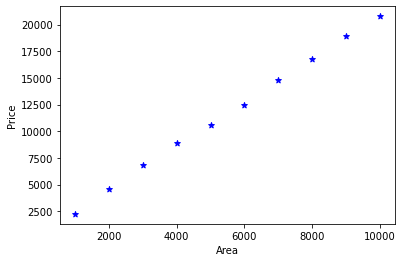

In [4]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(dataset.area,dataset.price,color='blue',marker='*')

In [5]:
'''Segregate x and y'''
x=dataset.drop('price',axis='columns')
x

,area
0,1000
1,2000
2,3000
3,4000
4,5000
5,6000
6,7000
7,8000
8,9000
9,10000


In [6]:
y=dataset.price
y

0     2245
1     4575
2     6874
3     8878
4    10589
5    12457
6    14785
7    16785
8    18958
9    20789
Name: price, dtype: int64

In [7]:
'''train test split'''
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [8]:
'''TRAINING DATASET USING Linear Regression'''
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

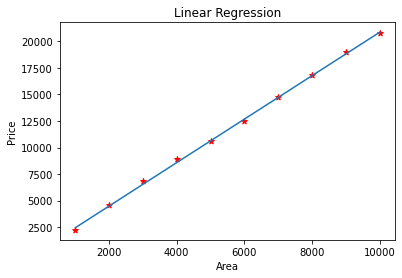

In [9]:
plt.scatter(x,y,color='red',marker='*')
plt.plot(x,model.predict(x))
plt.title('Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


In [10]:
'R squared score=1-(SSR/SST) whr SSR is Sum of Squared Residuals,SST is Sum of Squared Total'
rsquared=model.score(x_test,y_test)
print(rsquared)

0.998190495241606


In [11]:
'Adjusted R squared of the model=1-[(1-R Squared)*((n-1)/(n-p-1))]'
n=len(dataset)  #LENGTH OF TOTAL DATASET
p=len(dataset.columns)-1   #LENGTH OF FEATURES
adjr=1-(1-rsquared)*(n-1)/(n-p-1)
print(adjr)

0.9979643071468067


In [16]:
'''Predicted Price for land sq.ft of custom values'''
x=6600
LandAreainSqft=[[x]]
PredictedmodelResult=model.predict(LandAreainSqft)
print(PredictedmodelResult)

[13896.5103139]


In [17]:
'''To check if our model is right'''
#y=mx+c
m=model.coef_
print(m)

[2.04409417]


In [18]:
c=model.intercept_
print(c)

405.48878923767006


In [15]:
#y=mx+c
y=m*x+c
print('The price of {0} square feet land is: {1}'.format(x,y[0]))

The price of 6500 square feet land is: 13692.100896860986
